# Diamond cuts are categorized into 5 as “Premium”, “Fair”,“Good”, “Very Good” and “Ideal”. Test using ANOVA whether the prices of diamonds are different by the ‘cut’ of them at 𝛼 = 0.05.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv', index_col=0)
data1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Observe the response values by the 'cut' using groupby()

In [6]:
data1.groupby("cut").agg({'price':['mean', 'std', 'min', 'max']})

price                         
                  mean          std  min    max
cut                                            
Fair       4358.757764  3560.386612  337  18574
Good       3928.864452  3681.589584  327  18788
Ideal      3457.541970  3808.401172  326  18806
Premium    4584.257704  4349.204961  326  18823
Very Good  3981.759891  3935.862161  336  18818

Text(0.5, 1.0, 'Boxplot about the price grouped by cut')

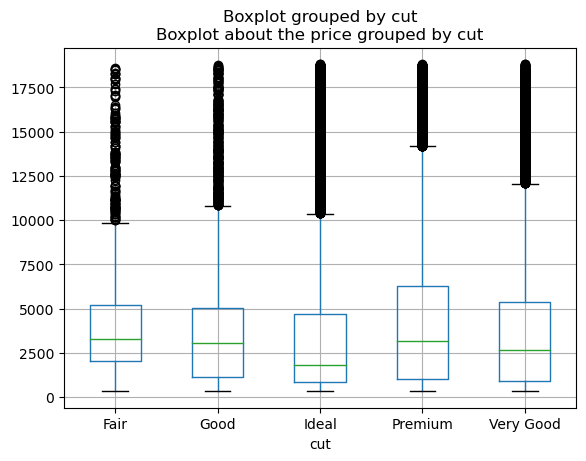

In [7]:
data1.boxplot("price", by = "cut")
plt.title("Boxplot about the price grouped by cut")

## ANOVA table

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [9]:
price_fit = smf.ols("price~C(cut,Sum)", data = data1).fit()
table1 = sm.stats.anova_lm(price_fit)
print(table1)

                  df        sum_sq       mean_sq           F         PR(>F)
C(cut, Sum)      4.0  1.104175e+10  2.760436e+09  175.688717  8.428307e-150
Residual     53935.0  8.474314e+11  1.571209e+07         NaN            NaN


In [10]:
import statsmodels.stats.multicomp as mc
from scipy import stats

comp = mc.MultiComparison(data1['price'], data1['cut'])
comptable,_,_ = comp.allpairtest(stats.ttest_ind, method = "bonf")
comptable

group1,group2,stat,pval,pval_corr,reject
Fair,Good,4.0984,0.0,0.0004,True
Fair,Ideal,9.1995,0.0,0.0,True
Fair,Premium,-2.0035,0.0451,0.4514,False
Fair,Very Good,3.6495,0.0003,0.0026,True
Good,Ideal,7.8715,0.0,0.0,True
Good,Premium,-9.4221,0.0,0.0,True
Good,Very Good,-0.8086,0.4188,1.0,False
Ideal,Premium,-25.6509,0.0,0.0,True
Ideal,Very Good,-11.9659,0.0,0.0,True
Premium,Very Good,11.619,0.0,0.0,True
